In [58]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
file_path = "../../data/processed/preprocessed_data.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)
df = pd.DataFrame(json_data)

In [60]:
df.head()

,title,score,body,num_comments,flair,nsfw,awards,created_hour,created_dayofweek,combined_text,cleaned_text,flair_encoded
0,"Polestar's 'Trade In Your Tesla' $20,000 Deal ...",1211,,324,General,False,0,23,6,"Polestar's 'Trade In Your Tesla' $20,000 Deal ...",Polestar s Trade In Your Tesla 20 000 Deal Is ...,0
1,Can confirm it looks better in real life,906,,182,Vehicles - Model Y,False,0,4,6,Can confirm it looks better in real life,Can confirm it looks better in real life,1
2,New Model Y Ultra Red,904,New Model Y Ultra Red photos from Tesla Meatpa...,149,Vehicles - Model Y,False,0,22,0,New Model Y Ultra Red New Model Y Ultra Red ph...,New Model Y Ultra Red New Model Y Ultra Red ph...,1
3,Toronto Drops Tesla from Taxi Grant Program as...,789,,183,General,False,0,0,3,Toronto Drops Tesla from Taxi Grant Program as...,Toronto Drops Tesla from Taxi Grant Program as...,0
4,Tesla and Steak ‘n Shake partner to roll out 1...,783,,86,Energy - Charging,False,0,21,4,Tesla and Steak ‘n Shake partner to roll out 1...,Tesla and Steak n Shake partner to roll out 10...,2


# Score, commnet and flair Analysis

In [61]:
score = df["score"]
comments = df["num_comments"]

             score  num_comments
count    60.000000     60.000000
mean    290.300000    109.716667
std     259.655593     89.342816
min       0.000000      1.000000
25%     117.000000     55.500000
50%     232.500000     83.000000
75%     354.250000    146.500000
max    1211.000000    403.000000
Correlation (score vs. comments): 0.69


<Axes: xlabel='score', ylabel='num_comments'>

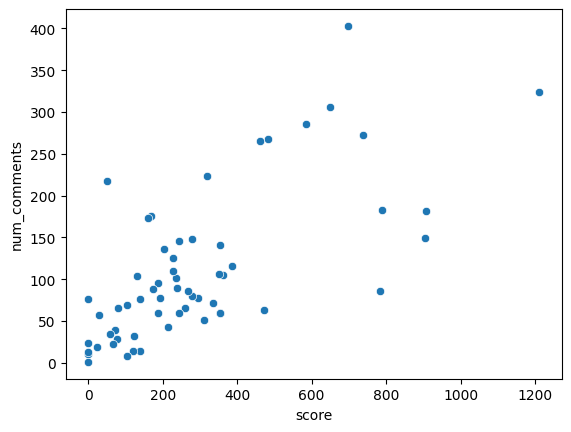

In [62]:
# Summary stats
print(df[['score', 'num_comments']].describe())

# Correlation between score and comments
correlation = df['score'].corr(df['num_comments'])
print(f"Correlation (score vs. comments): {correlation:.2f}")

sns.scatterplot(x='score', y='num_comments', data=df)

flair
Vehicles - Model Y               17
General                          15
Energy - Charging                 8
Vehicles - Cybertruck             8
Full Self-Driving / Autopilot     6
Vehicles - Model 3                1
Vehicles - Model S                1
Optimus Bot                       1
Vehicles - Roadster               1
Vehicles - Model X                1
Announcement/Meta                 1
Name: count, dtype: int64
flair
Vehicles - Model 3               739.000000
Vehicles - Model S               472.000000
General                          369.866667
Energy - Charging                316.875000
Optimus Bot                      269.000000
Vehicles - Model Y               260.764706
Vehicles - Cybertruck            238.875000
Vehicles - Roadster              227.000000
Vehicles - Model X               188.000000
Full Self-Driving / Autopilot    182.666667
Announcement/Meta                  0.000000
Name: score, dtype: float64


<Axes: xlabel='flair'>

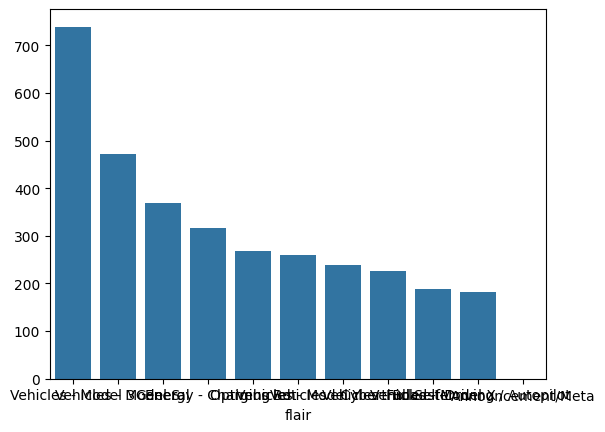

In [63]:
# Frequency of flairs
flair_counts = df['flair'].value_counts()
print(flair_counts)

# Compare average score by flair
flair_score = df.groupby('flair')['score'].mean().sort_values(ascending=False)
print(flair_score)

# Visualize
sns.barplot(x=flair_score.index, y=flair_score.values)

### Conclusion 
##### These things are utterly useless

# Text-Based Analysis

### Sentiment Analysis

In [64]:
text_body = df["cleaned_text"]
text_body.head()

0    Polestar s Trade In Your Tesla 20 000 Deal Is ...
1            Can confirm it looks better in real life 
2    New Model Y Ultra Red New Model Y Ultra Red ph...
3    Toronto Drops Tesla from Taxi Grant Program as...
4    Tesla and Steak n Shake partner to roll out 10...
Name: cleaned_text, dtype: object

In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for text in text_body:
    sentiment = analyzer.polarity_scores(text)
    sentiments.append(sentiment["compound"])

print(sentiments)
print(sum(sentiments))

[0.0, 0.4404, 0.5859, 0.3612, -0.1779, 0.0, 0.0, 0.4215, 0.5423, 0.4939, 0.0, 0.7906, -0.1027, 0.0, 0.6369, 0.3818, 0.34, 0.0, 0.3612, 0.0, 0.0, 0.128, 0.0, 0.0, 0.0, 0.4215, 0.5106, 0.0, 0.0, -0.4215, 0.2263, 0.0, 0.0, 0.6369, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.2023, 0.0, 0.0, 0.0, 0.0, -0.5994, 0.0, 0.3612, 0.0, 0.4215, 0.0, 0.2023, 0.0, 0.0, 0.5106, 0.0, -0.2732, 0.0, 0.0258, -0.716, 0.0]
7.2226


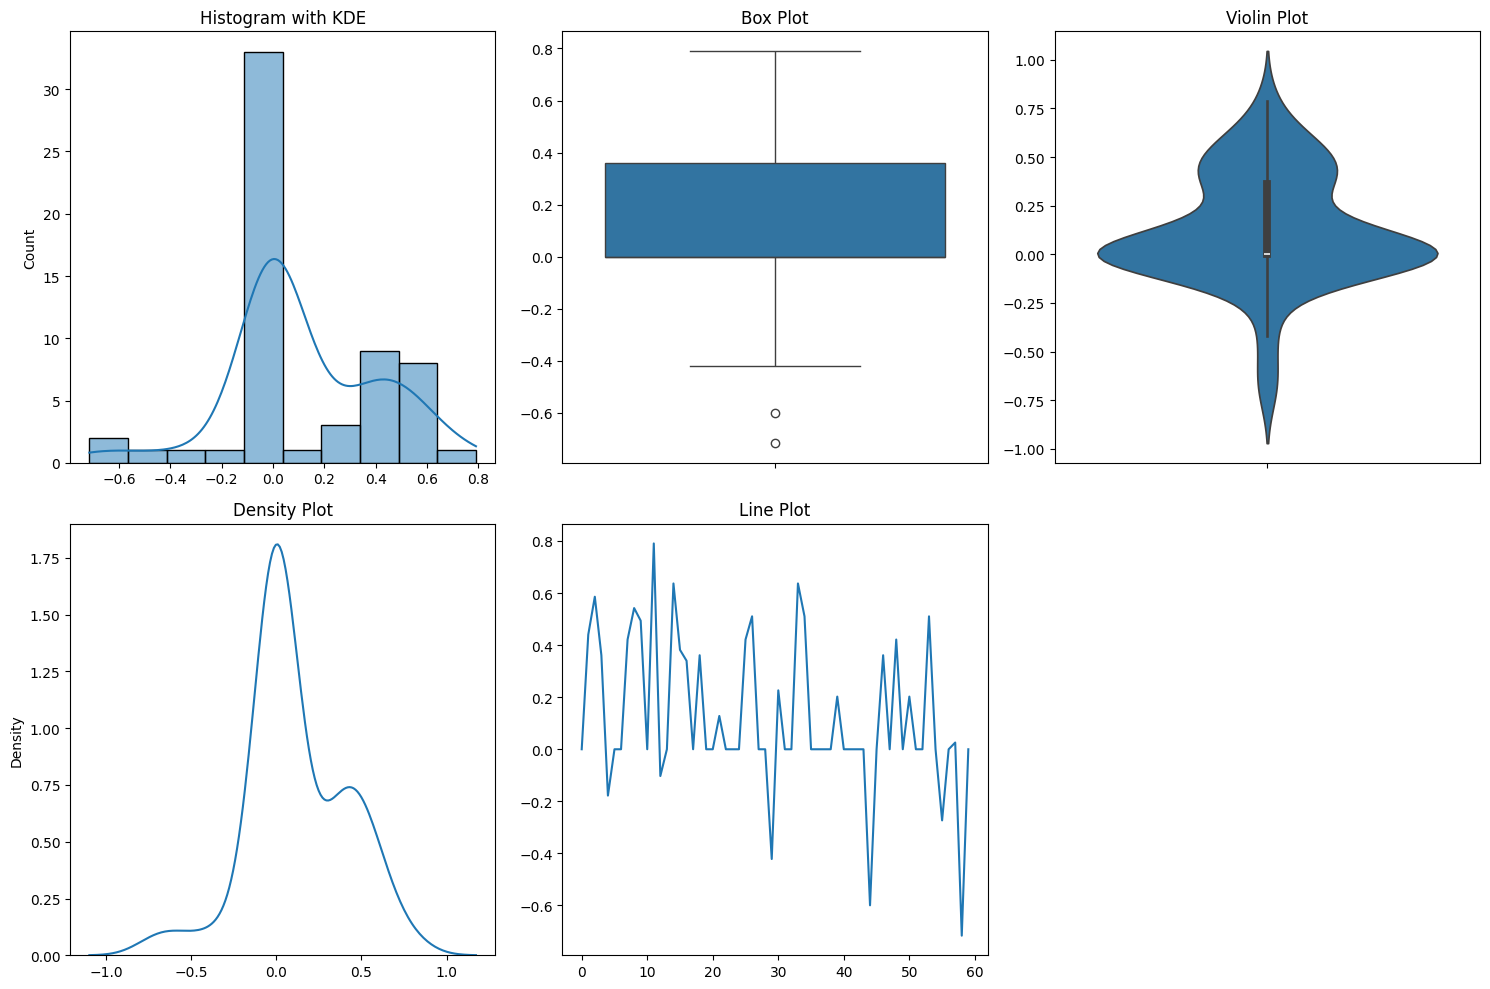

In [66]:
data = sentiments

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histogram
sns.histplot(data, bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram with KDE')

# Box plot
sns.boxplot(data=data, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot')

# Violin plot
sns.violinplot(data=data, ax=axes[0, 2])
axes[0, 2].set_title('Violin Plot')

# Density Plot
sns.kdeplot(data, ax=axes[1, 0])
axes[1, 0].set_title('Density Plot')

# Line Plot
sns.lineplot(x=range(len(data)), y=data, ax=axes[1, 1])
axes[1, 1].set_title('Line Plot')

# Empty plot (just to complete the 2x3 grid)
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### I see absolutely no good insight here, maybe data science is not for me

In [67]:
df["sentiment"] = sentiments

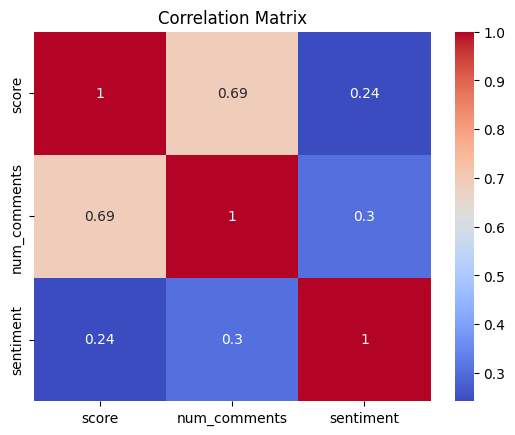

In [68]:
# Correlation matrix
corr_matrix = df[['score', 'num_comments', 'sentiment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()